In [1]:
%matplotlib inline

from IPython.display import clear_output
import torch
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from dataset import *
from tqdm import tqdm

from CDP_test_real import test

cuda


# for 200x200 images

In [3]:
n_test = 12
n_batch = 1
n_steps = 50

dirs = Path('classical_crop200/')
x_test = []
h = w = 200
for file in dirs.glob('*.png'):
    img = cv2.imread(str(file),0)/255
    img = cv2.resize(img,(h,w), interpolation = cv2.INTER_CUBIC)
    x_test.append(img)
x_test = np.array(x_test)
print('x_test:',x_test.shape)

dataset = 'celeba'
n_masks = 4
alpha = 4/n_masks
mask_path_learned = f'masks/{dataset}_learned_{n_masks}.npy'
mask_path_random = f'masks/{dataset}_random_{n_masks}.npy'
mask1 = np.load(mask_path_learned)
mask2 = np.load(mask_path_random)

mask1 = np.array([cv2.resize(dt,(h,w), interpolation = cv2.INTER_CUBIC) for dt in np.squeeze(mask1)])
mask1 = np.expand_dims(np.expand_dims(mask1, axis=0), axis=2)
mask2 = np.array([cv2.resize(dt,(h,w), interpolation = cv2.INTER_CUBIC) for dt in np.squeeze(mask2)])
mask2 = np.expand_dims(np.expand_dims(mask2, axis=0), axis=2)




from time import time
t0 = time()
x_rec1,_,psnr1 = test(mask1,alpha,x_test,n_test,n_batch,n_steps)
t1 = time()
x_rec2,_,psnr2 = test(mask2,alpha,x_test,n_test,n_batch,n_steps)
t2 = time()

print(f"{t1-t0:.2f}, {np.mean(psnr1):.2f}")
print(f"{t2-t1:.2f}, {np.mean(psnr2):.2f}")

 17%|█▋        | 2/12 [00:00<00:00, 18.86it/s]

x_test: (12, 200, 200)


100%|██████████| 12/12 [00:00<00:00, 22.60it/s]

0.61, 79.86
0.56, 20.50


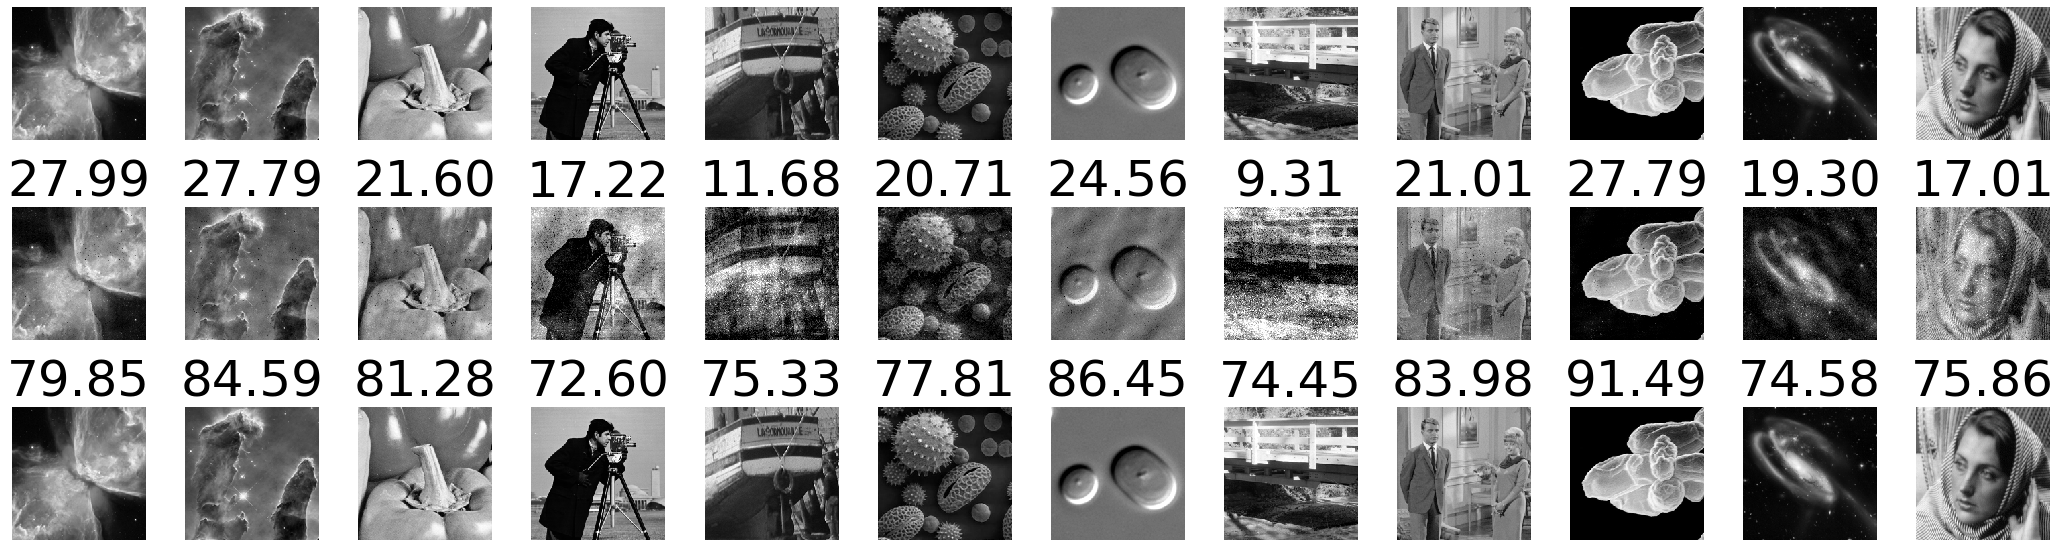

In [4]:
from random import random

    
x_test = np.squeeze(x_test)
x_rec1 = np.squeeze(x_rec1)
x_rec2 = np.squeeze(x_rec2)
nc = 1

plot_list = list(range(n_test))

n = len(plot_list)
# display GT    
fig, ax = plt.subplots(3, n,figsize=(n*2+5, 8))
plt.gray()
text_size = 50
for c in range(n):
    idx = plot_list[c]
    ax[0,c].imshow(np.squeeze(x_test[idx]))
    ax[1,c].imshow(np.squeeze(x_rec2[idx]))
    ax[1,c].set_title(f'{psnr2[idx]:.2f}',fontsize=text_size)
    ax[2,c].imshow(np.squeeze(x_rec1[idx]))
    ax[2,c].set_title(f'{psnr1[idx]:.2f}',fontsize=text_size)
[axi.set_axis_off() for axi in ax.ravel()]

plt.tight_layout()
plt.show()

# for 512x512 images

In [5]:
n_test = 12
n_batch = 1
n_steps = 50

dirs = Path('classical/')
x_test = []
h = w = 512
for file in dirs.glob('*.png'):
    img = cv2.imread(str(file),0)/255
    img = cv2.resize(img,(h,w), interpolation = cv2.INTER_CUBIC)
    x_test.append(img)
x_test = np.array(x_test)
print('x_test:',x_test.shape)

x_test: (12, 512, 512)


In [6]:
dataset = 'celeba'
n_masks = 4
alpha = 4/n_masks
mask_path_learned = f'masks/{dataset}_learned_{n_masks}.npy'
mask_path_random = f'masks/{dataset}_random_{n_masks}.npy'
mask1 = np.load(mask_path_learned)
mask2 = np.load(mask_path_random)

mask1 = np.array([cv2.resize(dt,(h,w), interpolation = cv2.INTER_CUBIC) for dt in np.squeeze(mask1)])
mask1 = np.expand_dims(np.expand_dims(mask1, axis=0), axis=2)
mask2 = np.array([cv2.resize(dt,(h,w), interpolation = cv2.INTER_CUBIC) for dt in np.squeeze(mask2)])
mask2 = np.expand_dims(np.expand_dims(mask2, axis=0), axis=2)

from time import time

t0 = time()
x_rec1,_,psnr1 = test(mask1,alpha,x_test,n_test,n_batch,n_steps)
t1 = time()
x_rec2,_,psnr2 = test(mask2,alpha,x_test,n_test,n_batch,n_steps)
t2 = time()
print(f"{t1-t0:.2f}, {np.mean(psnr1):.2f}")
print(f"{t2-t1:.2f}, {np.mean(psnr2):.2f}")

100%|██████████| 12/12 [00:02<00:00,  4.59it/s]


3.23, 43.09
2.90, 18.42


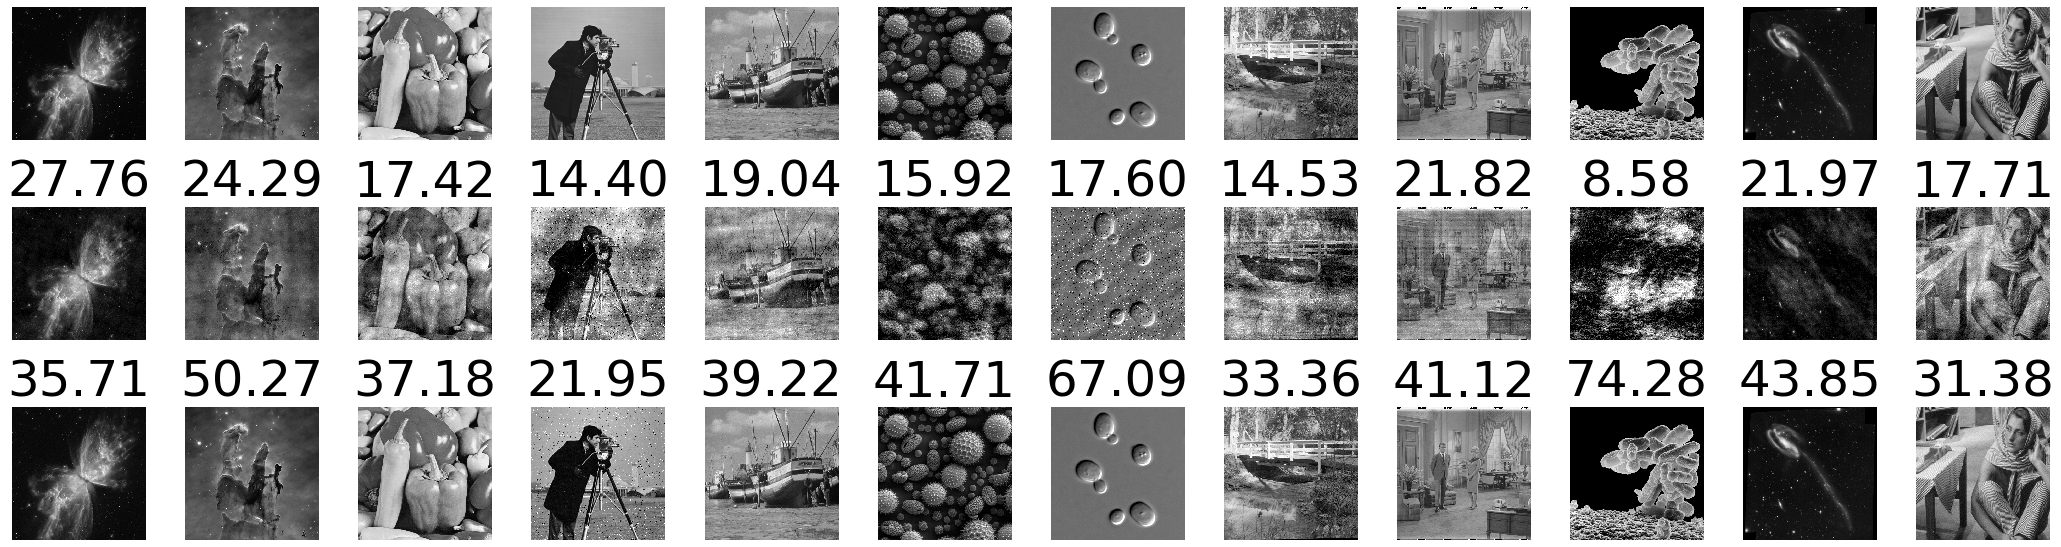

In [7]:
from random import random
    
x_test = np.squeeze(x_test)
x_rec1 = np.squeeze(x_rec1)
x_rec2 = np.squeeze(x_rec2)
nc = 1

plot_list = list(range(n_test))

n = len(plot_list)
# display GT    
fig, ax = plt.subplots(3, n,figsize=(n*2+5, 8))
plt.gray()
text_size = 50
for c in range(n):
    idx = plot_list[c]
    ax[0,c].imshow(np.squeeze(x_test[idx]))
    ax[1,c].imshow(np.squeeze(x_rec2[idx]))
    ax[1,c].set_title(f'{psnr2[idx]:.2f}',fontsize=text_size)
    ax[2,c].imshow(np.squeeze(x_rec1[idx]))
    ax[2,c].set_title(f'{psnr1[idx]:.2f}',fontsize=text_size)
[axi.set_axis_off() for axi in ax.ravel()]

plt.tight_layout()
plt.show()